In this notebook, I will develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, I will generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>1</b> and the values in <b>y</b> such that: 
<b>yi = 5*xi + b (b is distributed between 0 and 1)</b>


In [36]:
X = np.random.rand(50)
X

array([0.80300028, 0.38727547, 0.0215511 , 0.98420026, 0.02474131,
       0.46436483, 0.32740212, 0.93654941, 0.05531899, 0.17982947,
       0.32533313, 0.26795619, 0.93887491, 0.15902275, 0.01926146,
       0.89783881, 0.50244082, 0.81995772, 0.88115182, 0.10503441,
       0.03490701, 0.20919794, 0.60904683, 0.53526819, 0.50912811,
       0.57852967, 0.11790768, 0.05853693, 0.56847625, 0.39012346,
       0.88611332, 0.66317018, 0.53157788, 0.86421633, 0.30548062,
       0.72692287, 0.71357233, 0.02479554, 0.58816609, 0.54339428,
       0.08655997, 0.71781458, 0.3414082 , 0.08586665, 0.22212884,
       0.62417956, 0.71171436, 0.73014895, 0.98028031, 0.58352551])

In [37]:
y = 5*X + np.random.rand(50)
y

array([4.34518512, 2.63390127, 0.88238074, 5.718548  , 0.39071263,
       3.2634123 , 2.12975108, 5.03749661, 0.67289585, 1.81873173,
       2.25331157, 1.94735582, 4.87002529, 0.94718475, 0.89873569,
       4.90219669, 2.85817106, 4.11815219, 4.97571871, 1.28594561,
       0.507888  , 1.68876628, 3.26773717, 2.81394299, 3.20654361,
       3.76746306, 0.93335728, 1.13768136, 3.72536562, 2.40805896,
       5.09678259, 4.08258273, 3.04151234, 4.45750103, 1.62575936,
       4.00761598, 3.57375785, 0.87715616, 3.72925034, 3.44928101,
       0.81366085, 3.85571146, 1.82655827, 0.43479651, 1.70949051,
       3.33225091, 4.22332232, 4.34461113, 5.80062903, 3.3663909 ])

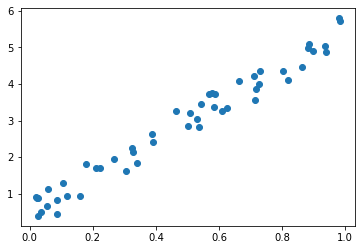

In [39]:
plt.scatter(X, y)

# 1- Batch Gradient Descent

#### I will create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, and optimum values of Theta_0 and Theta_1

In [52]:
def batch_GD(X_input, y_input, alpha, max_iterations):
    m = len(X_input)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # Start with an initial guess that the weights are zeros
    theta = np.zeros(2)
    for i in range(max_iterations):
        # predict the output
        h = X*theta[1] + theta[0]
        # calculate the error and the cost, and add the cost to the 'all_costs' list.
        error = h - y
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        #calculate the gradients and update the weights.
        gradient0 = (1/ m) * np.sum(error)
        theta[0] = theta[0] - (alpha * gradient0)

        gradient1 = (1/ m) * np.sum(error*X)
        theta[1] = theta[1] - (alpha * gradient1)
        # add the weights to the 'all_thetas' list.
        all_thetas.append(theta.copy())
        
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 0 and cost_change < 0.0001):
            print(f'it only took {i} iterations')
            break
        
    return all_costs, theta, all_thetas

#### Try your function with any input parameterss of your choice.

In [53]:
alpha = 0.01
max_iterations = 10000
all_costs, theta, all_thetas = batch_GD(X, y, alpha, max_iterations)

it only took 1512 iterations


#### now we have the trained weights and can calculate the most likely predicted output and calculate the accuracy (using r2_score).

In [54]:
# predict the output
y_pred = theta[0] + theta[1]*X

# calculate r2 score.
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9115832408986827

#### Ploting cost vs. epochs

Text(0.5, 1.0, 'cost vs. epochs')

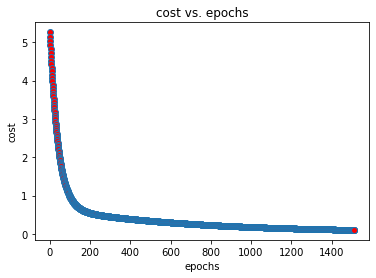

In [55]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

#### Ploting Theta_0 vs. cost and Theta_1 vs. cost

Text(0.5, 1.0, 'theta 0 vs cost')

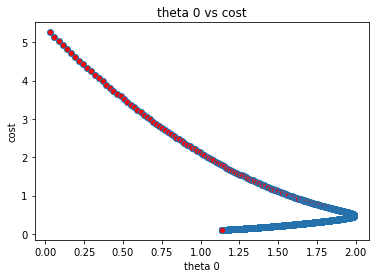

In [56]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

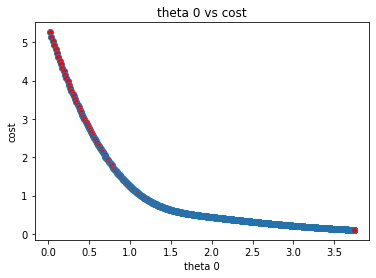

In [57]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

#### Ploting all regression lines till converge

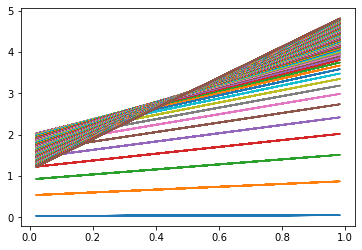

In [60]:
for i in range(0, len(all_thetas), 20):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

#### Plot the best regression line

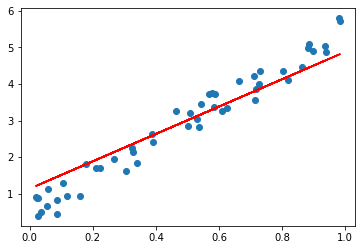

In [59]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

#### Try different learning rate and number of iterations then plot cost vs. epochs, cost vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [103]:
alpha = 1.6
max_iterations = 10000
all_costs, theta, all_thetas = batch_GD(X, y, alpha, max_iterations)

it only took 269 iterations


In [104]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score.
r2_score(y, y_pred)

0.9652718115704698

Text(0.5, 1.0, 'cost vs. epochs')

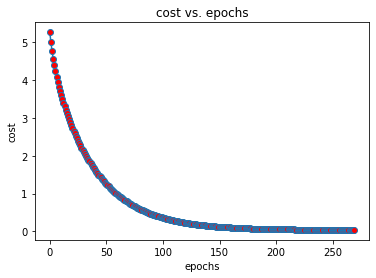

In [105]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs cost')

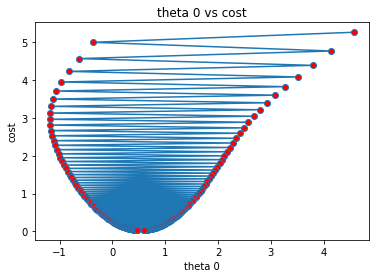

In [106]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

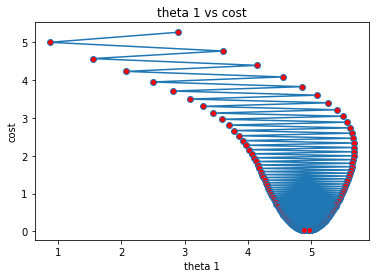

In [107]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

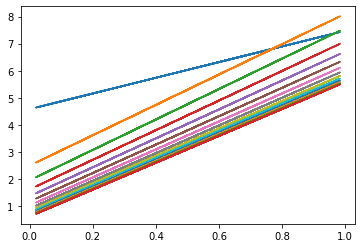

In [108]:
for i in range(0, len(all_thetas), 10):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

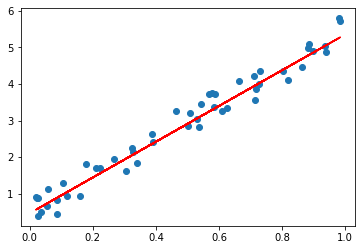

In [109]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

**we saw from the above plots in the second trial there are many overshoots, this because the learning rate is very large. This can lead to some problems.**

# 2- Mini-Batch Gradient Descent
### Now I will implement the Mini-Batch Gradient Descent and rpeat the above plots and evaluations


In [129]:
def mini_batch_GD(X, y, batch_size, alpha, max_iterations):
    m = len(X)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    for i in range(max_iterations):
        # loop on each batch.
        for j in range(0, m, batch_size):
            # x and y slice from the batch.
            x_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            # predict the output and calculate the error.
            h = x_batch*theta[1] + theta[0]
            error = h - y_batch
            
            # calculate the gradient for each weight and update them.
            gradient0 = (1/m) * np.sum(error)
            theta[0] = theta[0] - alpha*gradient0
            
            gradient1 = (1/m) * np.sum(error*x_batch)
            theta[1] = theta[1] - alpha*gradient1
            
            # store the weights in the dedicated list
            all_thetas.append(theta.copy())
            
            # calculate the cost store it in the dedicated list
            cost = np.sum(np.power(error, 2)) / (2*m)
            all_costs.append(cost)
            
        # the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.001 or (i > 1 and abs(cost_change) < 0.0001):
            print(f'it only took {i} iterations')
            break
        
                        
    return all_costs, theta, all_thetas

In [140]:
alpha = 0.1
iters = 10000
batch_size = 4
all_costs, theta, all_thetas = mini_batch_GD(X, y, batch_size, alpha, iters)

it only took 356 iterations


### Calculating the predicted output and the accuracy (using r2_score).

In [141]:
y_pred = theta[0] + theta[1]*X

r2_score(y, y_pred)

0.965766214692291

### Ploting cost vs. epochs

Text(0.5, 1.0, 'cost vs. epochs')

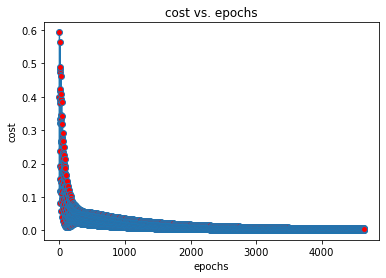

In [142]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

### Ploting theta 0 vs. cost and theta 1 vs. cost

Text(0.5, 1.0, 'theta 0 vs cost')

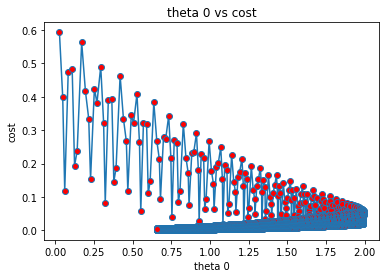

In [143]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

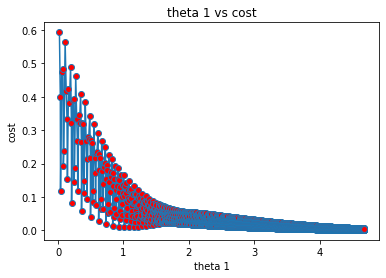

In [144]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

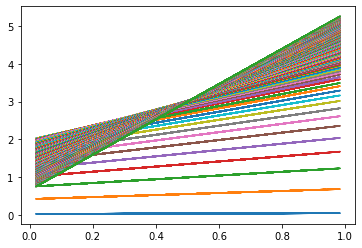

In [145]:
for i in range(0, len(all_thetas), 20):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

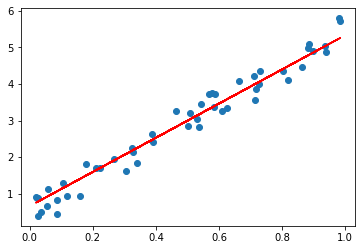

In [146]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

**In Mini-Batch gradient descent there are many oscillations. that's because when we calculate the error, we do it on only a batch from the data instead of the whole data, so each batch will take the cost to its direction.**

## 3- Stochastic Gradient Descent

#### Finally, I will implement the Stochastic gradient descent and repeat the above plots and evaluations

In [159]:
def stochastic_GD(X, y, alpha, max_iterations):
    m = len(X)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    for i in range(max_iterations):
        # loop on each row in the data.
        for j in range(0, m):
            # predict the output and calculate the error for this row
            h = X[j]*theta[1] + theta[0]
            error = h - y[j]
            
            # calculate the gradient for each weight and update them.
            gradient0 = error
            theta[0] = theta[0] - alpha*gradient0
            
            gradient1 = error * X[j]
            theta[1] = theta[1] - alpha*gradient1
            
            # calculate the cost store it in the 'all_costs' list
            cost = np.power((error), 2)
            all_costs.append(cost)
            # add the weights to the 'all_thetas' list
            all_thetas.append(theta.copy())
            
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if (gradient < 0.001) or (i > 1 and abs(cost_change) < 0.0001):
            print(f'it only took {i} iterations')
            break
    return all_costs, theta, all_thetas

In [160]:
alpha = 0.001
iters = 1000
all_costs, theta, all_thetas = stochastic_GD(X, y, alpha, iters)

it only took 499 iterations


### Calculating the predicted output and the accuracy (using r2_score).

In [161]:
y_pred = theta[0] + theta[1]*X

r2_score(y, y_pred)

0.9554700297649886

### Ploting cost vs. epochs

Text(0.5, 1.0, 'cost vs. epochs')

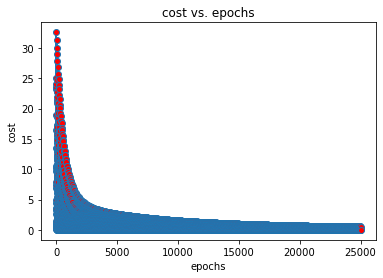

In [162]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

### Ploting theta 0 vs. cost and theta 1 vs. cost

Text(0.5, 1.0, 'theta 0 vs cost')

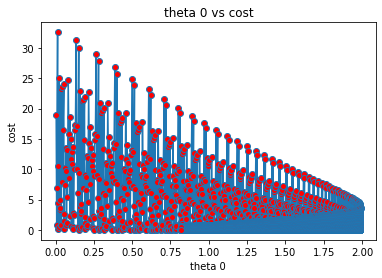

In [163]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

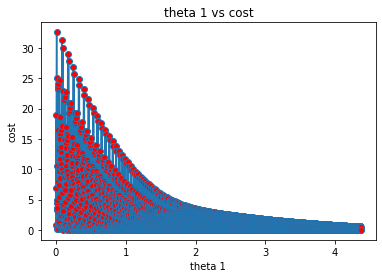

In [164]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

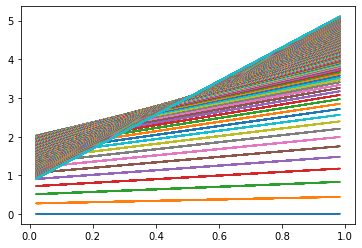

In [165]:
for i in range(0, len(all_thetas), 100):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

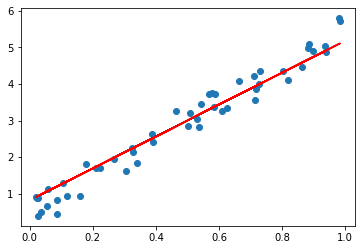

In [166]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

**In stochastic gradient descent we use every single gradient to update the weights. These gradients are very noisy and have a lot of variance with respect to their directions and values. Meaning the gradients that we compute on each sample are only rough estimates of the true gradient that points towards the increase of the loss function. In other words, in this case, we have a lot of noise. However, this fact can avoid the local minima during training because the high variance can cause the gradient to jump out of a local minimum.**